<a href="https://colab.research.google.com/github/alastra32/DS-Unit-2-Kaggle-Challenge/blob/master/module1/assignment_kaggle_challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 1

## Assignment
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what other columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What other columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Try other [scikit-learn scalers](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this problem, you may want to use the parameter `logistic=True`

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```



In [1]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module1')

     |████████████████████████████████| 92kB 3.4MB/s 
     |████████████████████████████████| 133kB 8.8MB/s 
Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.1.1)
     |████████████████████████████████| 614kB 41.4MB/s 
     |████████████████████████████████| 225kB 39.1MB/s 
     |████████████████████████████████| 768kB 36.1MB/s 
     |████████████████████████████████| 51kB 20.7MB/s 
     |████████████████████████████████| 194kB 44.2MB/s 
     |████████████████████████████████| 737kB 40.9MB/s 
     |████████████████████████████████| 51kB 19.1MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=5079cc31309c82c2e3ecaadd6117396bf833595374907a6f1c218dad5dab18b3
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=465383db6ee4d1cb008dabb9d439f4dab76fec43f

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv('../data/tanzania/train_features.csv'), 
                 pd.read_csv('../data/tanzania/train_labels.csv'))
test = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [76]:
train.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

 Do train/validate/test split with the Tanzania Waterpumps data.

In [79]:
# Split train into train & val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'], random_state=32)

train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, what other columns have zeros and shouldn't? What other columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)

In [0]:
import numpy as np

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Creating a new instance
    X = X.copy()
    
#dealing with the latitude 
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    #cleaning zeros with null values
    cols_with_zeros = ['longitude', 'latitude']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
            
    # dropping duplicate
    X = X.drop(columns='quantity_group')
    #engineering new feature
    X['date_recorded_1']=pd.to_datetime(X['date_recorded'], infer_datetime_format = True)
    X['num_years_to_inspection']=X['construction_year']-X['date_recorded_1'].dt.year 
    
    # Reduce cardinality for Installer feature ...
    top = X['funder'].value_counts()[:110].index
    X.loc[~X['funder'].isin(top), 'funder'] = 'OTHER'
   
   
   
    # Reduce cardinality for Installer feature ...
    top = X['installer'].value_counts()[:125].index
    X.loc[~X['installer'].isin(top), 'installer'] = 'OTHER'

    return X


train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.

In [81]:
train.describe(exclude = 'number').T.sort_values(by = 'unique')

,count,unique,top,freq,first,last
recorded_by,47520,1,GeoData Consultants Ltd,47520,NaN,NaN
public_meeting,44859,2,True,40815,NaN,NaN
permit,45062,2,True,31070,NaN,NaN
source_class,47520,3,groundwater,36651,NaN,NaN
status_group,47520,3,functional,25807,NaN,NaN
management_group,47520,5,user-group,41984,NaN,NaN
quantity,47520,5,enough,26507,NaN,NaN
quality_group,47520,6,good,40630,NaN,NaN
waterpoint_type_group,47520,6,communal standpipe,27695,NaN,NaN
source_type,47520,7,spring,13625,NaN,NaN


In [82]:
# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the columns we don't need
train_features = train.drop(columns=[target, 'date_recorded_1','recorded_by','id'])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 350
categorical_features = cardinality[cardinality <= 350].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features
print(features)

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year', 'num_years_to_inspection', 'date_recorded', 'funder', 'installer', 'basin', 'region', 'lga', 'public_meeting', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']


In [0]:
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [92]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline (
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    DecisionTreeClassifier(max_depth=24,min_samples_leaf=6, random_state=32)
)

pipeline.fit(X_train, y_train)
print ('Training Accuracy', pipeline.score(X_train, y_train))
print ('Validation Accuracy', pipeline.score(X_val, y_val))
print('Vs Baseline',pipeline.score(X_val, y_val)- 0.7827441077441077)
y_pred = pipeline.predict(X_test)

Training Accuracy 0.853577441077441
Validation Accuracy 0.7827441077441077
Vs Baseline 0.0


In [89]:
0.7827441077441077

0.7827441077441077

Get and plot your feature importances.

In [30]:
pipeline.named_steps

{'decisiontreeclassifier': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=24,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=5, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=32, splitter='best'),
 'onehotencoder': OneHotEncoder(cols=['date_recorded', 'basin', 'region', 'lga', 'public_meeting',
                     'recorded_by', 'scheme_management', 'permit',
                     'extraction_type', 'extraction_type_group',
                     'extraction_type_class', 'management', 'management_group',
                     'payment', 'payment_type', 'water_quality', 'quality_group',
                     'quantity', 'source', 'source_type', 'source_class',
                     'waterpoint_type', 'waterpoint_type_group'],
               drop_invariant=Fal

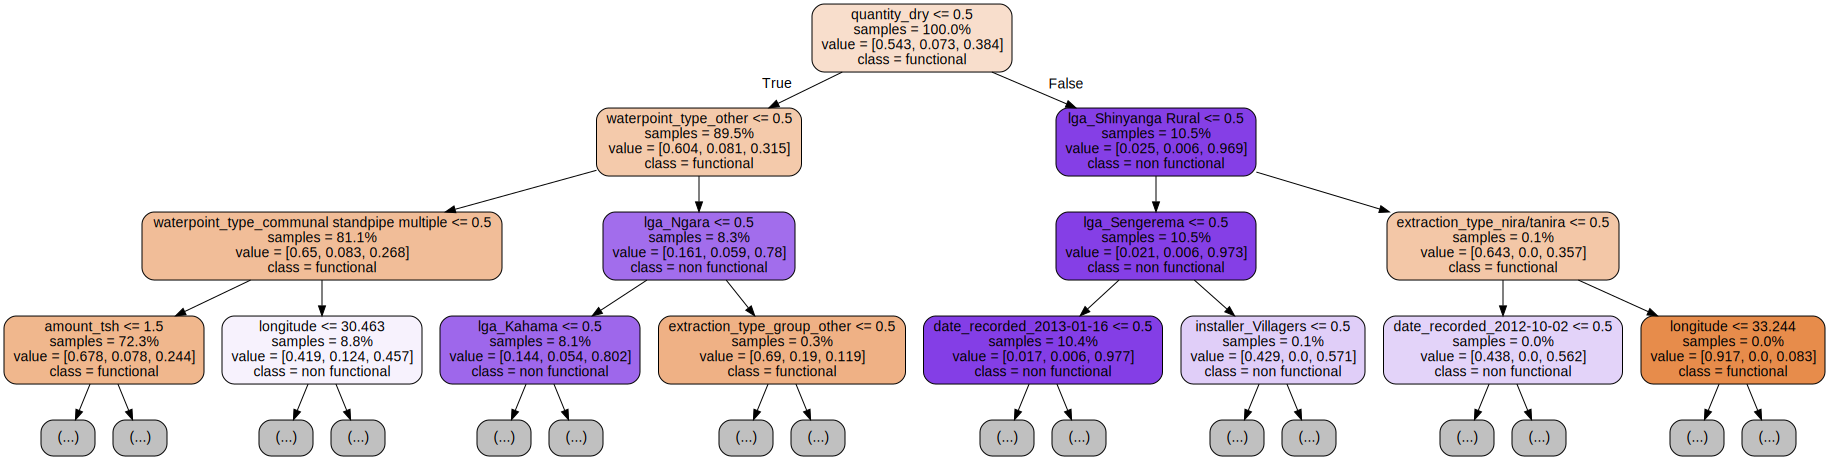

In [93]:
# Plot tree
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
# Plot tree
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
import graphviz
from sklearn.tree import export_graphviz

pipeline = make_pipeline(
    
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    DecisionTreeClassifier(max_depth=15, random_state=42)

)
pipeline.fit(X_train, y_train)


model = pipeline.named_steps['decisiontreeclassifier']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns

dot_data = export_graphviz(model, 
                           out_file=None, 
                           max_depth=3, 
                           feature_names=encoded_columns,
                           class_names=model.classes_, 
                           impurity=False, 
                           filled=True, 
                           proportion=True, 
                           rounded=True)   
display(graphviz.Source(dot_data))

In [0]:
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('submission-1.csv', index=False)

In [97]:
!head submission-1.csv

id,status_group
50785,non functional
51630,functional
17168,functional
45559,non functional
49871,functional
52449,functional
24806,functional
28965,non functional
36301,non functional


In [0]:
if in_colab:
  from google.colab import files
  files.download('submission-1.csv')

Further Feature Research

funder	44616	1716	
installer	44603	1929	
ward	47520	2082	
scheme_name	24988	2563	
subvillage	47234	17231	
wpt_name	47520	30661

In [62]:
#looking for top 80% of funder
train.funder.value_counts(normalize=True)[:110].sum()

0.805002689618074

In [59]:
#looking for top 80% of installer
train.installer.value_counts(normalize=True)[:125].sum()

0.814272582561711

In [65]:
#looking for top 80% of ward
train.ward.value_counts(normalize=True)[:150].sum()

0.26140572390572386

In [68]:
#looking for top 80% of scheme_name
train.scheme_name.value_counts(normalize=True)[:350].sum()

0.6100528253561709

In [69]:
#looking for top 80% of subvillage
train.subvillage.value_counts(normalize=True)[:350].sum()

0.23701147478511242

In [70]:
#looking for top 80% of wpt_name
train.wpt_name.value_counts(normalize=True)[:350].sum()

0.26140572390572386

In [0]:
  # Reduce cardinality for Installer feature ...
# Get a list of the top 50 feature
    top50 = X['installer'].value_counts()[:50].index
# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
    X.loc[~X['installer'].isin(top50), 'installer'] = 'OTHER'
    
     # Reduce cardinality for funder feature ...
    # Get a list of the top 50 variable
    top50 = X['funder'].value_counts()[:50].index
    # At locations where the variable is NOT in the top 10,
    # replace the variable with 'OTHER'
    X.loc[~X['funder'].isin(top50), 'funder'] = 'OTHER'

    # return the wrangled dataframe